# Las matemáticas tras la regresión logística

## Las tablas de contingencia

In [1]:
import pandas as pd
from IPython.display import Image

In [2]:
df = pd.read_csv('../datasets/gender-purchase/Gender Purchase.csv')
df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [3]:
df.shape

(511, 2)

Una tabla de contingencia es básicamente una representación de las frecuencias de las observaciones que caen dentro de las diversas categorías para dos o más variables.

In [4]:
# crosstab() sirve para crurzar filas y columnas y obtener información de ellas
contingence_table = pd.crosstab(df['Gender'], df['Purchase'])
contingence_table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [5]:
contingence_table.sum(axis=1)

Gender
Female    265
Male      246
dtype: int64

In [6]:
contingence_table.sum(axis=0)

Purchase
No     231
Yes    280
dtype: int64

In [7]:
contingence_table.astype('float').div(contingence_table.sum(axis=1), axis=0)

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


## La probabilidad condicional

La probabilidad condicional define la probabilidad de que un cierto suceso sea verdad o no sabiendo ciertas restricciones relacionadas con el evento que ya sabemos que están o no pasando.

In [8]:
from IPython.display import display, Math, Latex

¿Cuál es la probabilidad de que un cliente compre un producto sabiendo que es hombre?


In [9]:
display(Math(r'P(Purchase|Male) = \frac{Número\ total\ de\ compras\ hechas\ por\ hombres}{Número\ total\ de\ hombres\ del\ grupo} = \frac{Purchase\cap Male }{Male}'))
121/246

<IPython.core.display.Math object>

0.491869918699187

In [10]:
display(Math(r'P(No\ Purchase|Male) = 1-P(Purchase|Male)'))
125/246

<IPython.core.display.Math object>

0.508130081300813

¿Cuál es la probabilidad de que sabiendo que un cliente compra un producto es mujer?

In [11]:
display(Math(r'P(Female|Purchase) = \frac{Número\ total\ de\ compras\ hechas\ por\ mujeres}{Número\ total\ de\ compras} = \frac{Female\cap Purchase}{Purchase}'))
159/280

<IPython.core.display.Math object>

0.5678571428571428

In [12]:
display(Math(r'P(Male|Purchase)'))
121/280

<IPython.core.display.Math object>

0.43214285714285716

In [13]:
display(Math(r'P(Male|Purchase)'))
print(121/246)
display(Math(r'P(NO\ Purchase|Male)'))
print(125/246)
display(Math(r'P(Purchase|Female)'))
print(159/265)
display(Math(r'P(NO\ Purchase|Female)'))
print(106/265)

<IPython.core.display.Math object>

0.491869918699187


<IPython.core.display.Math object>

0.508130081300813


<IPython.core.display.Math object>

0.6


<IPython.core.display.Math object>

0.4


## Ratio de Probabilidades
El cociente entre los casos de éxito sobre los de fracaso en el suceso estudiado y para cada grupo.

In [14]:
display(Math(r'P_m = \ probabilidad\ de\ compra\ hecha\ por\ hombres'))
display(Math(r'P_f = \ probabilidad\ de\ compra\ hecha\ por\ mujeres'))
display(Math(r'odds\in[{0, +\infty}]'))
display(Math(r'odds_{purchase, male} = \frac{P_m}{1-P_m} = \frac{N_{p, m}}{N_{\bar p, m}}'))
display(Math(r'odds_{purchase, female} = \frac{P_f}{1-P_f}= \frac{N_{p, f}}{N_{\bar p, f}}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
pm = 121/246
pf = 159/265
# Ratio de los hombres
odds_m = pm/(1-pm) # 121/125
# Ratio de las mujeres
odds_f = pf/(1-pf) # 159/106

In [16]:
odds_m

0.9680000000000002

In [17]:
odds_f

1.4999999999999998

* Si el ratio es superior a 1, es más probable el éxito que el fracaso. Cuanto mayor es el ratio, más probabilidad de éxito en nuestro suceso
* Si el ratio es exactamente igual a 1, éxito y fracaso son equiprobables (p = 0.5)
* Si el ratio es menor que 1, el fracaso es más probable que el éxito. Cuanto menor es el ratio, menor es la probabilidad de éxito del suceso

Un modo de determinar cuál de los dos grupos es más probable de éxito:

In [18]:
display(Math(r'odds_{ratio} = \frac{odds_{purchase, male}}{odds_{purchase, female}}'))

<IPython.core.display.Math object>

In [19]:
odds_r = odds_m / odds_f
odds_r

0.6453333333333335

In [20]:
1 / odds_r # odds_f / odds_m 

1.5495867768595037

## De la regresión lineal a la logística

In [21]:
display(Math(r'y = \alpha + \beta + \cdot\ x'))
display(Math(r'(x, y)\in[-\infty, +\infty]^2'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

La primera diferencia es que la variable y ya no es continua, sino discreta

In [22]:
display(Math(r'y\in\{0, 1\}'))
display(Math(r'P\in [0, 1]'))
display(Math(r'X\in [-\infty, \infty]'))
display(Math(r'P = \alpha + \beta\cdot X'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

P es la probabilidad condicionada de éxito o de fracaso condicionada a la presencia de la variable X 

In [23]:
display(Math(r'\frac{P}{1-P} = \alpha + \beta\cdot X\in [0, \infty]'))

<IPython.core.display.Math object>

In [24]:
display(Math(r'ln(\frac{P}{1-P}) = \alpha + \beta\cdot X'))

<IPython.core.display.Math object>

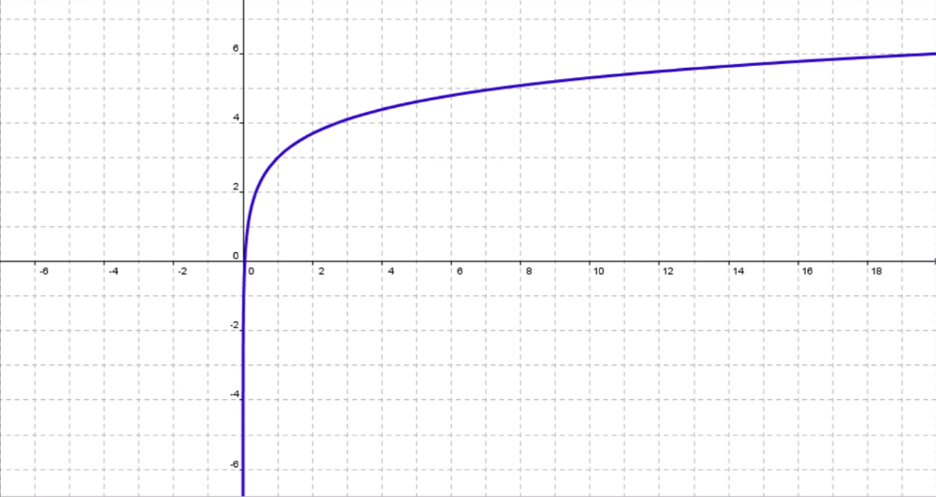

In [25]:
Image(filename='resources/ln.png')

In [26]:
display(Math(r'\begin{cases}\frac{P}{1-P}\in[0, 1]\Rightarrow ln(\frac{P}{1-P})\in[-\infty, 0]\\ \frac{P}{1-P}\in[1, \infty]\Rightarrow ln(\frac{P}{1-P})\in[0, \infty]\end{cases}'))

<IPython.core.display.Math object>

In [27]:
display(Math(r'ln(\frac{P}{1-P}) = \alpha + \beta\cdot X'))
display(Math(r'\frac{P}{1-P} = e^{\alpha + \beta\cdot X}'))
display(Math(r'P = \frac{e^{\alpha+\beta\cdot X}}{1 + e^{\alpha+\beta\cdot X}}'))
display(Math(r'P = \frac{1}{1 + e^{-(\alpha+\beta\cdot X)}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Se obtiene la recta de regresión lineal

In [28]:
display(Math(r'ln(\frac{P}{1-P}) = \alpha + \beta\cdot X'))

<IPython.core.display.Math object>

Se despeja la probabilidad con la siguiente fórmula

In [29]:
display(Math(r'P = \frac{1}{1 + e^{-(\alpha+\beta\cdot X)}}'))

<IPython.core.display.Math object>

* Si a + bX es muy pequeño (negativo), entonces P tiende a 0
* Si a + bX = 0, entonces P = 0.5
* Si a + bX es muy grande (positivo), entonces P tiende a 1

### Regresión logística múltiple

In [30]:
display(Math(r'P = \frac{1}{1 + e^{-(\alpha+\sum_{i=1}^n\beta_i\cdot x_i)}}'))

<IPython.core.display.Math object>

In [31]:
display(Math(r'\vec{\beta} = (\beta_1, \beta_2, \cdots, \beta_n)'))
display(Math(r'\vec{X} = (x_1, x_2, \cdots, x_n)'))
display(Math(r'P = \frac{1}{1 + e^{-(\alpha+\vec{\beta_i}\cdot \vec{X})}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>